This project will graph charts and utilize the information obtained about the American population by using an API and CSV file.

## Using an API to obtain the numbers of the U.S. population from 2013 to 2019

In [46]:
import requests
import json

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36 Edg/103.0.1264.71'
}


response = requests.get('https://datausa.io/api/data?drilldowns=Nation&measures=Population', headers = headers)
print(response)

<Response [200]>


## Unloading the JSON and using a for loop to print the population numbers, years, and the nation's ID. This API only had the information of the United States.

In [47]:
js = response.json()


years_hist = []

for record in js["data"]:
    print(record["Year"], " - ", record["Population"], " - ", record["ID Nation"])
    years_hist.append(int(record["Year"]))    
years_hist.reverse()

2019  -  328239523  -  01000US
2018  -  327167439  -  01000US
2017  -  325719178  -  01000US
2016  -  323127515  -  01000US
2015  -  321418821  -  01000US
2014  -  318857056  -  01000US
2013  -  316128839  -  01000US


## Calculating the total population from 2013 to 2019. Adding each year's population to a list; it will be used in the bar chart

In [48]:
population_hist = []
population_total = 0 

for pop in js['data']:
    population_total += pop['Population']
    population_hist.append(pop['Population'])
    
print("The combined population total from 2013 to 2019 is: ",'{:,}'.format(population_total))

print('\n')

population_hist.reverse()
print(population_hist)

The combined population total from 2013 to 2019 is:  2,260,658,371


[316128839, 318857056, 321418821, 323127515, 325719178, 327167439, 328239523]


## Calculating the population's average from the years 2013 to 2019

In [49]:
population_average = population_total/7
print("The population average from 2013 to 2019 is: ", "{:,.2f}".format(population_average))


The population average from 2013 to 2019 is:  322,951,195.86


In [50]:
population_average = 322951195.86

## Calculating the yearly increase of population

In [51]:
yearly_pop_increase = []
for i in range(1, len(population_hist)):
    i = population_hist[i] - population_hist[i - 1]
    yearly_pop_increase.append(i)
yearly_pop_increase   


[2728217, 2561765, 1708694, 2591663, 1448261, 1072084]

In [52]:
years_yearly_increase =  [2014, 2015, 2016, 2017, 2018, 2019]   ## This will be used in the yearly growth chart. 
                                                                ## The first population is needed in that graph

## Creating a pd series from of the population along with its corresponding year

In [53]:
import numpy as np
import pandas as pd

population = pd.Series(["316128839", "318857056", "321418821", "323127515", "325719178", "327167439", "328239523"], index = ["2013", "2014", "2015", "2016", "2017", "2018", "2019"])
population

2013    316128839
2014    318857056
2015    321418821
2016    323127515
2017    325719178
2018    327167439
2019    328239523
dtype: object

## Creating a pd series from the ID nation

In [54]:
IDNation = pd.Series(["01000US", "01000US", "01000US", "01000US", "01000US", "01000US", "01000US"], index = ["2013", "2014", "2015", "2016", "2017", "2018", "2019"])
IDNation

2013    01000US
2014    01000US
2015    01000US
2016    01000US
2017    01000US
2018    01000US
2019    01000US
dtype: object

## Creating a dataframe of the columns, population and ID nation, while being indexed by the corresponding year year

In [55]:
year = pd.DataFrame({"Population": population,
                     "ID Nation": IDNation})
year


,Population,ID Nation
2013,316128839,01000US
2014,318857056,01000US
2015,321418821,01000US
2016,323127515,01000US
2017,325719178,01000US
2018,327167439,01000US
2019,328239523,01000US


## Using matplotlib and seaborn to plot a bar chart with the x-axis representing the years and the y-axis representing population

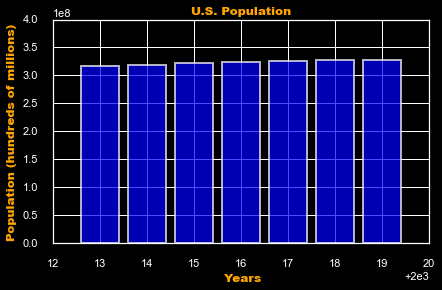

In [56]:
import matplotlib.pyplot as plt
from matplotlib import *
%matplotlib inline
import seaborn as sns
sns.set()


plt.style.use('dark_background')

plt.bar(years_hist, population_hist, linewidth = 2, color = 'blue', animated = True, edgecolor = 'white', alpha = 0.7)

plt.ylim(0, 400000000)
plt.xlabel(" Years", color = 'orange', fontweight = "heavy")
plt.ylabel("Population (hundreds of millions)", color = 'orange', fontweight = 'heavy')
plt.title("U.S. Population", color = 'orange', fontweight = "heavy")

plt.show()

## Plotting a chart of the yearly growth rate 2013 to 2019. 2013 isn't included because we did not compare it with a former value. 

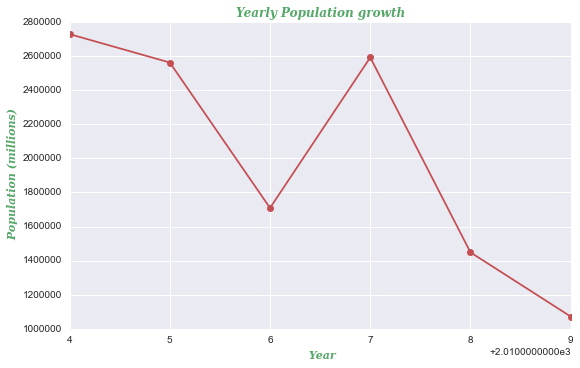

In [57]:
plt.style.use('seaborn')

plt.plot(years_yearly_increase, yearly_pop_increase, marker = 'o', color = 'r')
plt.xlabel(" Year", fontweight = 'heavy', fontstyle = "oblique", family ='serif', color = 'g')
plt.ylabel(" Population (millions)", fontweight = 'heavy', fontstyle = 'oblique', family = 'serif', color = 'g')
plt.title("Yearly Population growth", fontweight = 'heavy', fontstyle = 'oblique', family = 'serif', color = 'g');


In [58]:
# Importing the data using a CSV file
import csv
dataframe = pd.read_csv("C:\\Users\\haniy\\Downloads\\Python-1302\\PopulationReport.csv")
dataframe          

,Name,Pop. 1990,Pop. 2000,Pop. 2010,Pop. 2020,Pop. 2021,Change 2020-21
0,United States,"248,790,925","281,424,600","308,745,538","331,449,281","331,893,745",0.10%
1,Alabama,"4,040,389","4,447,207","4,779,736","5,024,279","5,039,877",0.30%
2,Alaska,"550,043","626,933","710,231","733,391","732,673",-0.10%
3,Arizona,"3,665,339","5,130,247","6,392,017","7,151,502","7,276,316",1.70%
4,Arkansas,"2,350,624","2,673,293","2,915,918","3,011,524","3,025,891",0.50%
5,California,"29,811,427","33,871,653","37,253,956","39,538,223","39,237,836",-0.80%
6,Colorado,"3,294,473","4,302,086","5,029,196","5,773,714","5,812,069",0.70%
7,Connecticut,"3,287,116","3,405,650","3,574,097","3,605,944","3,605,597",0.00%
8,Delaware,"666,168","783,559","897,934","989,948","1,003,384",1.40%
9,District of Columbia,"606,900","572,086","601,723","689,545","670,050",-2.80%


In [59]:
# Removing the commas from the numbers
dataframe.replace(",", "", regex=True, inplace=True) 

dataframe

,Name,Pop. 1990,Pop. 2000,Pop. 2010,Pop. 2020,Pop. 2021,Change 2020-21
0,United States,248790925,281424600,308745538,331449281,331893745,0.10%
1,Alabama,4040389,4447207,4779736,5024279,5039877,0.30%
2,Alaska,550043,626933,710231,733391,732673,-0.10%
3,Arizona,3665339,5130247,6392017,7151502,7276316,1.70%
4,Arkansas,2350624,2673293,2915918,3011524,3025891,0.50%
5,California,29811427,33871653,37253956,39538223,39237836,-0.80%
6,Colorado,3294473,4302086,5029196,5773714,5812069,0.70%
7,Connecticut,3287116,3405650,3574097,3605944,3605597,0.00%
8,Delaware,666168,783559,897934,989948,1003384,1.40%
9,District of Columbia,606900,572086,601723,689545,670050,-2.80%


In [60]:
# A list of the U.S. population from 1990 to 2021
usPop = []
usPop.append(dataframe["Pop. 1990"][0])
usPop.append(int(dataframe["Pop. 2000"][0]))
usPop.append(int(dataframe["Pop. 2010"][0]))
usPop.append(int(dataframe["Pop. 2020"][0]))
usPop.append(int(dataframe["Pop. 2021"][0]))
usPop

['248790925', 281424600, 308745538, 331449281, 331893745]

In [61]:
# The change of population rate for every state
changePop = dataframe["Change 2020-21"][1:52]
changePop

1      0.30%
2     -0.10%
3      1.70%
4      0.50%
5     -0.80%
6      0.70%
7      0.00%
8      1.40%
9     -2.80%
10     1.10%
11     0.80%
12    -0.90%
13     3.40%
14    -1.10%
15     0.30%
16     0.10%
17    -0.10%
18     0.10%
19    -0.70%
20     0.70%
21    -0.20%
22    -0.60%
23    -0.30%
24     0.00%
25    -0.40%
26     0.20%
27     1.80%
28     0.10%
29     1.30%
30     0.80%
31    -0.20%
32    -0.10%
33    -1.80%
34     1.10%
35    -0.50%
36    -0.20%
37     0.70%
38     0.20%
39    -0.30%
40    -0.20%
41     1.40%
42     1.00%
43     0.90%
44     1.30%
45     2.00%
46     0.40%
47     0.10%
48     0.40%
49    -0.60%
50     0.00%
51     0.30%
Name: Change 2020-21, dtype: object

In [73]:
# The 1990 population for every state
pop1990 = dataframe["Pop. 1990"][1:52].astype(int)
pop1990 


1      4040389
2       550043
3      3665339
4      2350624
5     29811427
6      3294473
7      3287116
8       666168
9       606900
10    12938071
11     6478149
12     1108229
13     1006734
14    11430602
15     5544156
16     2776831
17     2477588
18     3686892
19     4221826
20     1227928
21     4780753
22     6016425
23     9295287
24     4375665
25     2575475
26     5116901
27      799065
28     1578417
29     1201675
30     1109252
31     7747750
32     1515069
33    17990778
34     6632448
35      638800
36    10847115
37     3145576
38     2842337
39    11882842
40     1003464
41     3486310
42      696004
43     4877203
44    16986335
45     1722850
46      562758
47     6189197
48     4866669
49     1793477
50     4891954
51      453589
Name: Pop. 1990, dtype: int32

In [63]:
# The 2000 population for every state
pop2000 = dataframe["Pop. 2000"][1:52].astype(int)
pop2000


1      4447207
2       626933
3      5130247
4      2673293
5     33871653
6      4302086
7      3405650
8       783559
9       572086
10    15982571
11     8186653
12     1211497
13     1293957
14    12419927
15     6080827
16     2926538
17     2688925
18     4042193
19     4469035
20     1274779
21     5296647
22     6349364
23     9938823
24     4919631
25     2844754
26     5596564
27      902200
28     1711230
29     1998250
30     1235807
31     8414764
32     1819017
33    18977026
34     8046346
35      642237
36    11353336
37     3450451
38     3421524
39    12280548
40     1048259
41     4012023
42      754858
43     5689427
44    20851028
45     2233183
46      608613
47     7079057
48     5894281
49     1808193
50     5363757
51      493786
Name: Pop. 2000, dtype: int32

In [64]:
# # The 2010 population for every state
pop2010 = dataframe["Pop. 2010"][1:52].astype(int)
pop2010

1      4779736
2       710231
3      6392017
4      2915918
5     37253956
6      5029196
7      3574097
8       897934
9       601723
10    18801310
11     9687653
12     1360301
13     1567582
14    12830632
15     6483802
16     3046355
17     2853118
18     4339367
19     4533372
20     1328361
21     5773552
22     6547629
23     9883640
24     5303925
25     2967297
26     5988927
27      989415
28     1826341
29     2700551
30     1316470
31     8791894
32     2059179
33    19378102
34     9535483
35      672591
36    11536504
37     3751351
38     3831074
39    12702379
40     1052567
41     4625364
42      814180
43     6346105
44    25145561
45     2763885
46      625741
47     8001024
48     6724540
49     1852994
50     5686986
51      563626
Name: Pop. 2010, dtype: int32

In [65]:
# The 2020 population for every state
pop2020 = dataframe["Pop. 2020"][1:52].astype(int)
pop2020 

1      5024279
2       733391
3      7151502
4      3011524
5     39538223
6      5773714
7      3605944
8       989948
9       689545
10    21538187
11    10711908
12     1455271
13     1839106
14    12812508
15     6785528
16     3190369
17     2937880
18     4505836
19     4657757
20     1362359
21     6177224
22     7029917
23    10077331
24     5706494
25     2961279
26     6154913
27     1084225
28     1961504
29     3104614
30     1377529
31     9288994
32     2117522
33    20201249
34    10439388
35      779094
36    11799448
37     3959353
38     4237256
39    13002700
40     1097379
41     5118425
42      886667
43     6910840
44    29145505
45     3271616
46      643077
47     8631393
48     7705281
49     1793716
50     5893718
51      576851
Name: Pop. 2020, dtype: int32

In [66]:
# The 2021 population for every state
pop2021 = dataframe["Pop. 2021"][1:52].astype(int)
pop2021

1      5039877
2       732673
3      7276316
4      3025891
5     39237836
6      5812069
7      3605597
8      1003384
9       670050
10    21781128
11    10799566
12     1441553
13     1900923
14    12671469
15     6805985
16     3193079
17     2934582
18     4509394
19     4624047
20     1372247
21     6165129
22     6984723
23    10050811
24     5707390
25     2949965
26     6168187
27     1104271
28     1963692
29     3143991
30     1388992
31     9267130
32     2115877
33    19835913
34    10551162
35      774948
36    11780017
37     3986639
38     4246155
39    12964056
40     1095610
41     5190705
42      895376
43     6975218
44    29527941
45     3337975
46      645570
47     8642274
48     7738692
49     1782959
50     5895908
51      578803
Name: Pop. 2021, dtype: int32

In [67]:
# The names of every state 
name = dataframe["Name"][1:52]
name

1                  Alabama
2                   Alaska
3                  Arizona
4                 Arkansas
5               California
6                 Colorado
7              Connecticut
8                 Delaware
9     District of Columbia
10                 Florida
11                 Georgia
12                  Hawaii
13                   Idaho
14                Illinois
15                 Indiana
16                    Iowa
17                  Kansas
18                Kentucky
19               Louisiana
20                   Maine
21                Maryland
22           Massachusetts
23                Michigan
24               Minnesota
25             Mississippi
26                Missouri
27                 Montana
28                Nebraska
29                  Nevada
30           New Hampshire
31              New Jersey
32              New Mexico
33                New York
34          North Carolina
35            North Dakota
36                    Ohio
37                Oklahoma
3

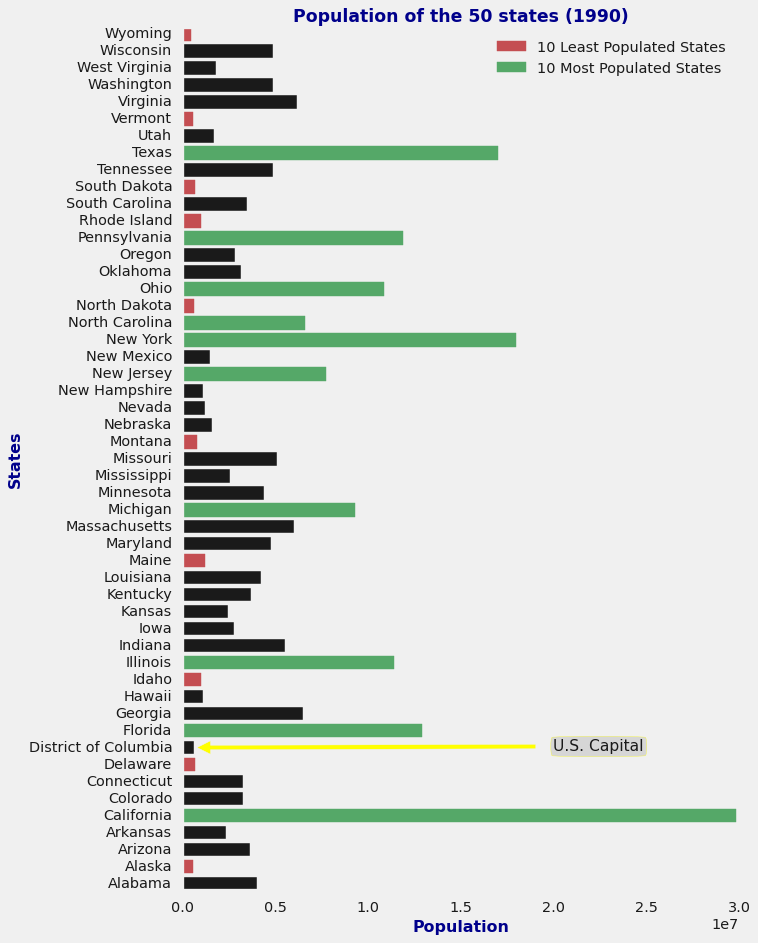

In [74]:
# Graphing the 1990 population for every state
import matplotlib.patches as mpatches 
plt.style.use('seaborn-talk')


plt.figure(figsize=(8,13))
bars = plt.barh(name, pop1990, color = 'k') 

# Coloring the states with the lowest population
bars[1].set_color('r')
bars[7].set_color('r')
bars[12].set_color('r')
bars[19].set_color('r')
bars[26].set_color('r')
bars[34].set_color('r')
bars[50].set_color('r')
bars[45].set_color('r')
bars[39].set_color('r')
bars[41].set_color('r')

# Coloring the states with the highest population
bars[4].set_color('g')
bars[43].set_color('g')
bars[32].set_color('g')
bars[9].set_color('g')
bars[38].set_color('g')
bars[13].set_color('g')
bars[35].set_color('g')
bars[22].set_color('g')
bars[30].set_color('g')
bars[33].set_color('g')
plt.xlim(0, 30000000, 10000000)


plt.title("Population of the 50 states (1990)", fontweight = 'heavy', color = '#00008B')
plt.ylabel("States", fontweight = 'heavy', color = '#00008B')
plt.xlabel("Population", fontweight = 'heavy', color = '#00008B')

# Legend
red_patch = mpatches.Patch(color = 'r', label = '10 Least Populated States')
green_patch = mpatches.Patch(color = 'g', label = '10 Most Populated States')
plt.legend(handles = [red_patch, green_patch], loc = "best")

# Annotating the U.S. Capital
plt.annotate("U.S. Capital", xy = (10, 8), xytext=(2.0e7, 7.8), bbox = dict(boxstyle = 'round4, pad = .2', color ='yellow' ,alpha = 0.7,fc = '0.8')
            ,arrowprops=dict(facecolor='yellow', shrink=0.04) )

plt.grid()
plt.show();

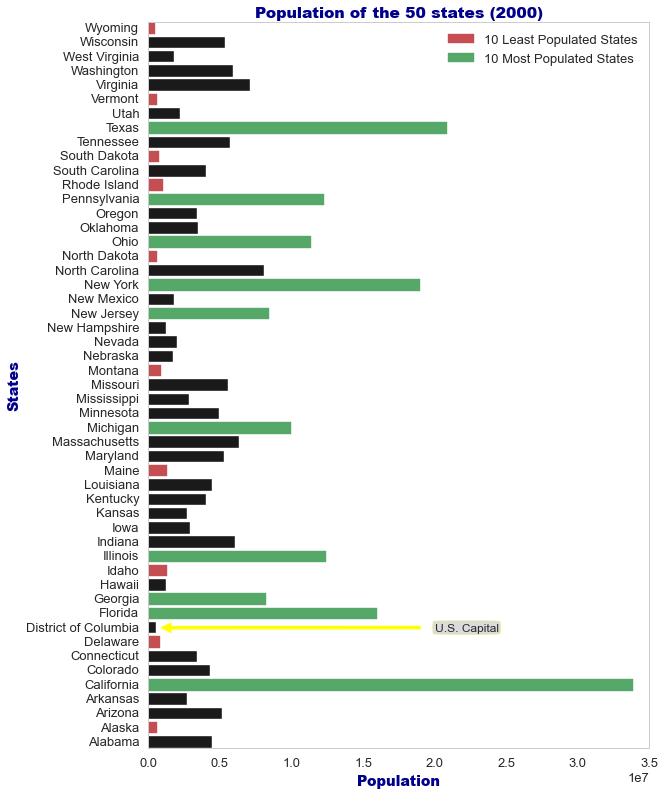

In [69]:
# Graphing the 2000 population for every state
plt.style.use('seaborn-whitegrid')


plt.figure(figsize=(8,13))
bars2 = plt.barh(name, pop2000, color = 'k')

# Coloring the states with the lowest population
bars2[1].set_color('r')
bars2[7].set_color('r')
bars2[12].set_color('r')
bars2[19].set_color('r')
bars2[26].set_color('r')
bars2[34].set_color('r')
bars2[50].set_color('r')
bars2[45].set_color('r')
bars2[39].set_color('r')
bars2[41].set_color('r')

# Coloring the states with the highest population
bars2[4].set_color('g')
bars2[43].set_color('g')
bars2[32].set_color('g')
bars2[9].set_color('g')
bars2[38].set_color('g')
bars2[13].set_color('g')
bars2[35].set_color('g')
bars2[22].set_color('g')
bars2[30].set_color('g')
bars2[10].set_color('g')
plt.xlim(0, 35000000, 10000000)


plt.title("Population of the 50 states (2000)", fontweight = 'heavy', color = '#00008B')
plt.ylabel("States", fontweight = 'heavy', color = '#00008B')
plt.xlabel("Population", fontweight = 'heavy', color = '#00008B')

# Legend
red_patch = mpatches.Patch(color = 'r', label = '10 Least Populated States')
green_patch = mpatches.Patch(color = 'g', label = '10 Most Populated States')
plt.legend(handles = [red_patch, green_patch], loc = "best")

# Annotating the U.S. Capital
plt.annotate("U.S. Capital", xy = (10, 8), xytext=(2.0e7, 7.8), bbox = dict(boxstyle = 'round4, pad = .2', color ='yellow' ,alpha = 0.7,fc = '0.8')
            ,arrowprops=dict(facecolor='yellow', shrink=0.04) )

plt.grid()
plt.show();

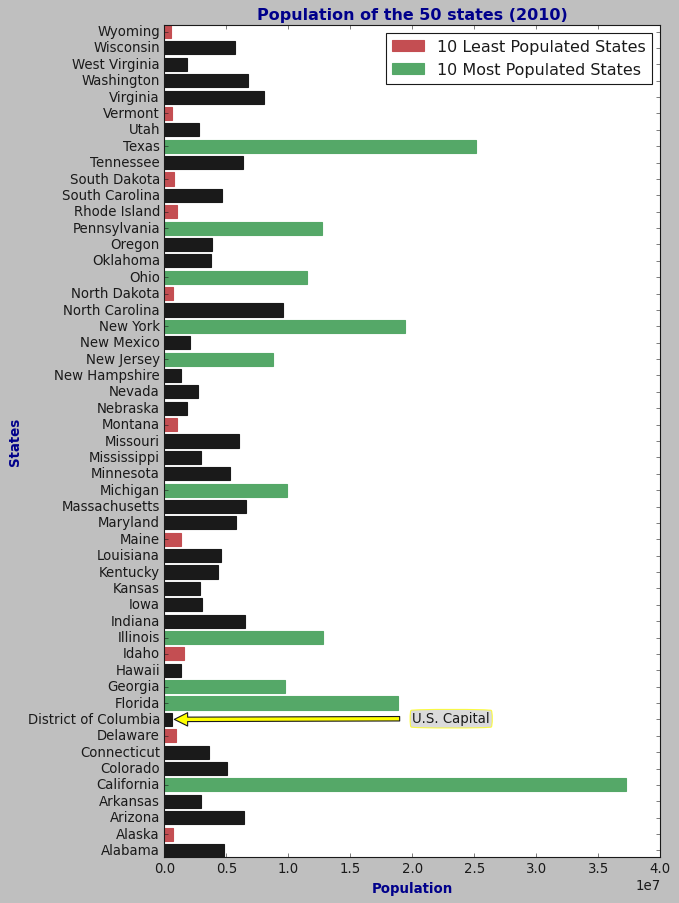

In [70]:
# Graphing the 2010 population for every state
plt.style.use('classic')


plt.figure(figsize=(8,13))
bars2 = plt.barh(name, pop2010, color = 'k')

# Coloring the states with the lowest population
bars2[1].set_color('r')
bars2[7].set_color('r')
bars2[12].set_color('r')
bars2[19].set_color('r')
bars2[26].set_color('r')
bars2[34].set_color('r')
bars2[50].set_color('r')
bars2[45].set_color('r')
bars2[39].set_color('r')
bars2[41].set_color('r')

# Coloring the states with the highest population
bars2[4].set_color('g')
bars2[43].set_color('g')
bars2[32].set_color('g')
bars2[9].set_color('g')
bars2[38].set_color('g')
bars2[13].set_color('g')
bars2[35].set_color('g')
bars2[22].set_color('g')
bars2[30].set_color('g')
bars2[10].set_color('g')
plt.xlim(0, 40000000, 10000000)


plt.title("Population of the 50 states (2010)", fontweight = 'heavy', color = '#00008B')
plt.ylabel("States", fontweight = 'heavy', color = '#00008B')
plt.xlabel("Population", fontweight = 'heavy', color = '#00008B')

# Legend
red_patch = mpatches.Patch(color = 'r', label = '10 Least Populated States')
green_patch = mpatches.Patch(color = 'g', label = '10 Most Populated States')
plt.legend(handles = [red_patch, green_patch], loc = "best")

# Annotating the U.S. Capital
plt.annotate("U.S. Capital", xy = (10, 8), xytext=(2.0e7, 7.8), bbox = dict(boxstyle = 'round4, pad = .2', color ='yellow' ,alpha = 0.7,fc = '0.8')
            ,arrowprops=dict(facecolor='yellow', shrink=0.04) )


plt.show();

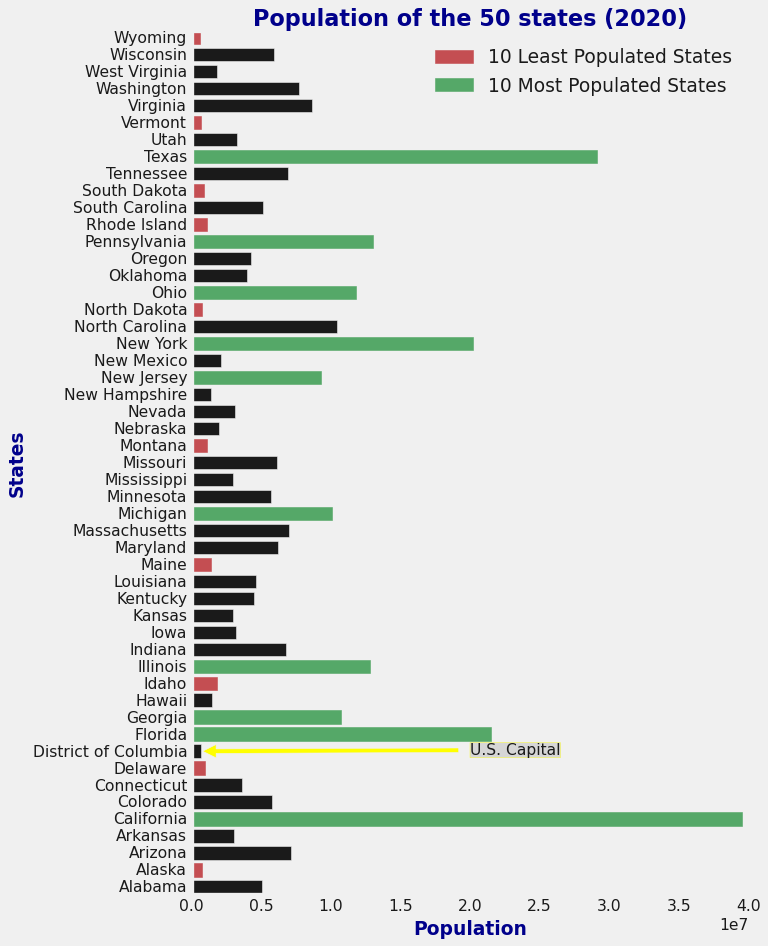

In [71]:
# Graphing the 2020 population for every state
plt.style.use('fivethirtyeight')


plt.figure(figsize=(8,13))
bars2 = plt.barh(name, pop2020, color = 'k')

# Coloring the states with the lowest population
bars2[1].set_color('r')
bars2[7].set_color('r')
bars2[12].set_color('r')
bars2[19].set_color('r')
bars2[26].set_color('r')
bars2[34].set_color('r')
bars2[50].set_color('r')
bars2[45].set_color('r')
bars2[39].set_color('r')
bars2[41].set_color('r')

# Coloring the states with the highest population
bars2[4].set_color('g')
bars2[43].set_color('g')
bars2[32].set_color('g')
bars2[9].set_color('g')
bars2[38].set_color('g')
bars2[13].set_color('g')
bars2[35].set_color('g')
bars2[22].set_color('g')
bars2[30].set_color('g')
bars2[10].set_color('g')
plt.xlim(0, 40000000, 10000000)


plt.title("Population of the 50 states (2020)", fontweight = 'heavy', color = '#00008B')
plt.ylabel("States", fontweight = 'heavy', color = '#00008B')
plt.xlabel("Population", fontweight = 'heavy', color = '#00008B')

# Legend
red_patch = mpatches.Patch(color = 'r', label = '10 Least Populated States')
green_patch = mpatches.Patch(color = 'g', label = '10 Most Populated States')
plt.legend(handles = [red_patch, green_patch], loc = "best")

# Annotating the U.S. Capital
plt.annotate("U.S. Capital", xy = (10, 8), xytext=(2.0e7, 7.8), bbox = dict(boxstyle = 'round4, pad = 0', color ='yellow' ,alpha = 0.7,fc = '0.8')
            ,arrowprops=dict(facecolor='yellow', shrink=0.04) )

plt.grid()
plt.show();

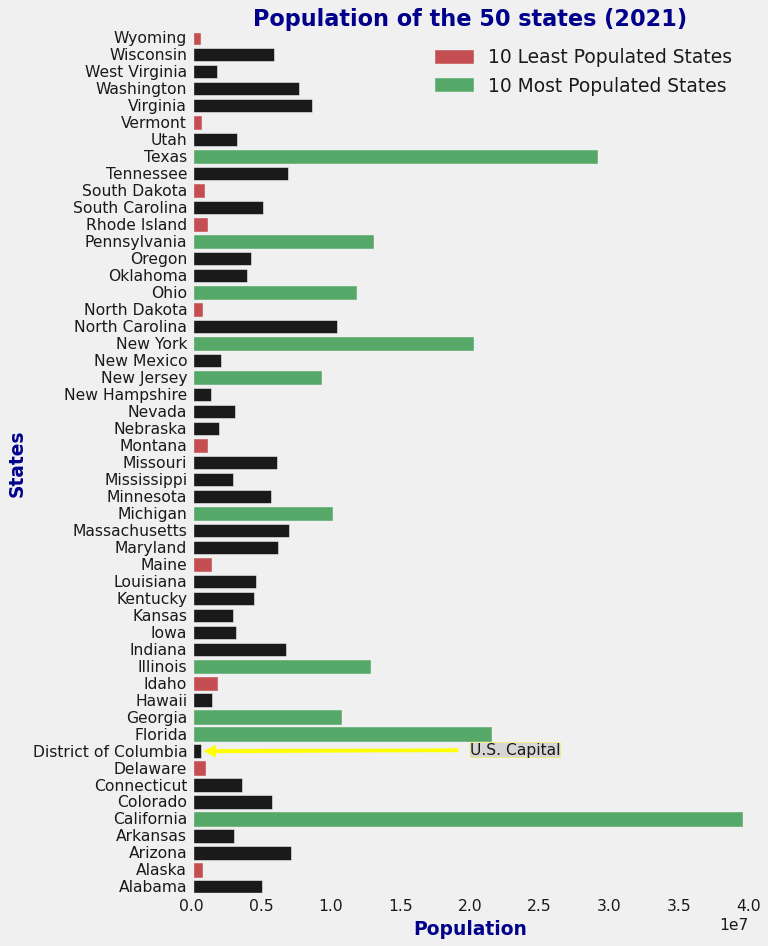

In [72]:
# Graphing the 2021 population for every state
plt.style.use('fivethirtyeight')


plt.figure(figsize=(8,13))
bars2 = plt.barh(name, pop2020, color = 'k')

# Coloring the states with the lowest population
bars2[1].set_color('r')
bars2[7].set_color('r')
bars2[12].set_color('r')
bars2[19].set_color('r')
bars2[26].set_color('r')
bars2[34].set_color('r')
bars2[50].set_color('r')
bars2[45].set_color('r')
bars2[39].set_color('r')
bars2[41].set_color('r')

# Coloring the states with the highest population
bars2[4].set_color('g')
bars2[43].set_color('g')
bars2[32].set_color('g')
bars2[9].set_color('g')
bars2[38].set_color('g')
bars2[13].set_color('g')
bars2[35].set_color('g')
bars2[22].set_color('g')
bars2[30].set_color('g')
bars2[10].set_color('g')
plt.xlim(0, 40000000, 10000000)


plt.title("Population of the 50 states (2021)", fontweight = 'heavy', color = '#00008B')
plt.ylabel("States", fontweight = 'heavy', color = '#00008B')
plt.xlabel("Population", fontweight = 'heavy', color = '#00008B')

# Legend
red_patch = mpatches.Patch(color = 'r', label = '10 Least Populated States')
green_patch = mpatches.Patch(color = 'g', label = '10 Most Populated States')
plt.legend(handles = [red_patch, green_patch], loc = "best")

# Annotating the U.S. Capital
plt.annotate("U.S. Capital", xy = (10, 8), xytext=(2.0e7, 7.8), bbox = dict(boxstyle = 'round4, pad = 0', color ='yellow' ,alpha = 0.7,fc = '0.8')
            ,arrowprops=dict(facecolor='yellow', shrink=0.04) )

plt.grid()
plt.show();